<h1>Modeling the Human Sinoatrial Node</h1>
<p>In this JupyterLab notebook, we will walk you through the process of simulating the behavior of a sinoatrial (SA) node, often referred to as the heart's natural pacemaker. The SA node generates electrical impulses that initiate the heartbeat, and by understanding its dynamics, we can gain insights into cardiac rhythm and function.</p>
    <p>Throughout this notebook, we will cover the following key steps:</p>
    <ol>
        <li><strong>Loading Model Parameters:</strong> We will start by loading the necessary model parameters that define the behavior of the SA node. These parameters influence how the electrical activity propagates through the node and how it initiates the cardiac cycle.</li>
        <li><strong>Generating a Sinoatrial Node Object:</strong> Using the loaded model parameters, we will create a sinoatrial node object that represents the virtual SA node. This object will encapsulate the node's properties and behaviors, allowing us to manipulate and simulate its activity.</li>
        <li><strong>Performing Simulation:</strong> With the SA node object in place, we will conduct a simulation of its electrical activity over a specific time period. By running the simulation, we can observe how the electrical impulses are generated, propagate through the heart, and trigger muscle contractions.</li>
        <li><strong>Plotting the Results:</strong> To visualize the outcomes of our simulation, we will use graphical plots to illustrate the electrical signals generated by the SA node. These visualizations will help us understand the intricate patterns of cardiac activity and the timing of heartbeats.</li>
    </ol>
<p>Whether you're new to cardiac physiology or seeking to explore the intricacies of the SA node's behavior, this notebook provides a hands-on opportunity to delve into the world of heart rhythms. So, let's get started by loading the model parameters and embarking on our journey to simulate and visualize the mesmerizing dance of the sinoatrial node.</p>
<p>The sinoatrial node model implementation is based on the work by Fabbri et al. <sup>[1]</sup>, which provides a comprehensive computational analysis of the human sinus node action potential. The CellML model used here is available on the CellML repository. We thank the authors for sharing their research and model.</p>

<p>This class implements the model described by Fabbri et al.<br>
The values for constants and initial conditions in this JSON structure were obtained from the CellML model available at: <a href="https://models.cellml.org/e/568/HumanSAN_Fabbri_Fantini_Wilders_Severi_2017.cellml/view">Link</a><br><br>
These values were derived from the original publication:<br>
Fabbri, Alan, et al. "Computational analysis of the human sinus node action potential: model development and effects of mutations." <i>The Journal of Physiology</i> 595.7 (2017): 2365-2396. (DOI: <a href="https://doi.org/10.1113/JP273259">10.1113/JP273259</a>)</p>

<p>For a detailed explanation of how this code was implemented and insights into modeling the transmembrane potential, please refer to the corresponding <a href="https://cellularsyntax.github.io/2023/08/12/modeling-the-human-sinoatrial-node.html">blog article</a>.</p>

In [2]:
%load_ext autoreload
%autoreload 2

from model.SinoAtrialNode import SinoAtrialNode
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from helper_functions import parse_model_parameters

# Load the JSON file containing model parameters
constants, initial_conditions, constant_desc, init_cond_desc = parse_model_parameters("../config/config.json")
# Extract constants and initial conditions from JSON data

# Set the simulation duration and create the SinoAtrialNode object
sim_dur = 2
san = SinoAtrialNode(constant_descriptions=constant_desc,
                     state_descriptions=init_cond_desc,
                     constants=constants,
                     initial_conditions=initial_conditions)

# print the model information (initial conditions and model parameters)
san.info()

# Solve the model using solve_ivp
sol = solve_ivp(san.calculate_derivatives, [0, sim_dur], list(san.y), method='BDF', rtol=1e-6,
                t_eval=np.arange(0, sim_dur, 1e-4), vectorized=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Model Information:

This class implements the model described by Fabbri et al. [1]
The values for constants and initial conditions in this JSON structure were obtained from the
CellML model available at: https://models.cellml.org/e/568/HumanSAN_Fabbri_Fantini_Wilders_Severi_2017.cellml
These values were derived from the original of Fabbri et al. [1].

[1] Fabbri, Alan, et al. "Computational analysis of the human sinus node action potential:
model development and effects of mutations. The Journal of Physiology 595.7 (2017): 2365-2396.
DOI: https://doi.org/10.1113/JP273259


Constants:
R in component Membrane: 8314.472 J/(kmol·K)
T in component Membrane: 310.0 K
F in component Membrane: 96485.3415 C/mol
C in component Membrane: 5.7e-05 µF
clamp_mode in component Membrane: 0.0 dimensionless
t_holding in component Voltage_clamp: 0.5 s
t_test in component Voltage_clamp: 0.5 s
V_test in component Voltage_

<h1>Visualizing the Results</h1>
<h2>Plotting of Selected States</h2>
<p>The code produces a figure with 9 subplots, representing selected essential states of the model, including membrane voltage V, submembrane calcium concentration Ca_sub, gating variables for sodium (m, h), L-type calcium (d_L, f_L, f_Ca), T-type calcium (d_T, f_T), and calcium dynamics in junctional and network sarcoplasmic reticulum (Ca_jsr, Ca_nsr) and intracellular calcium Ca_i.</p>

<p>The figure has been simplified to include only 9 subplots to focus on the most essential and representative states of the model. These selected states include key variables such as membrane voltage V, submembrane calcium concentration Ca_sub, and gating variables for different ionic currents that play a vital role in understanding the cell's electrophysiology. By concentrating on these states, the plot provides a clearer and more concise visualization, avoiding the complexity that would arise from including all 33 states.</p>




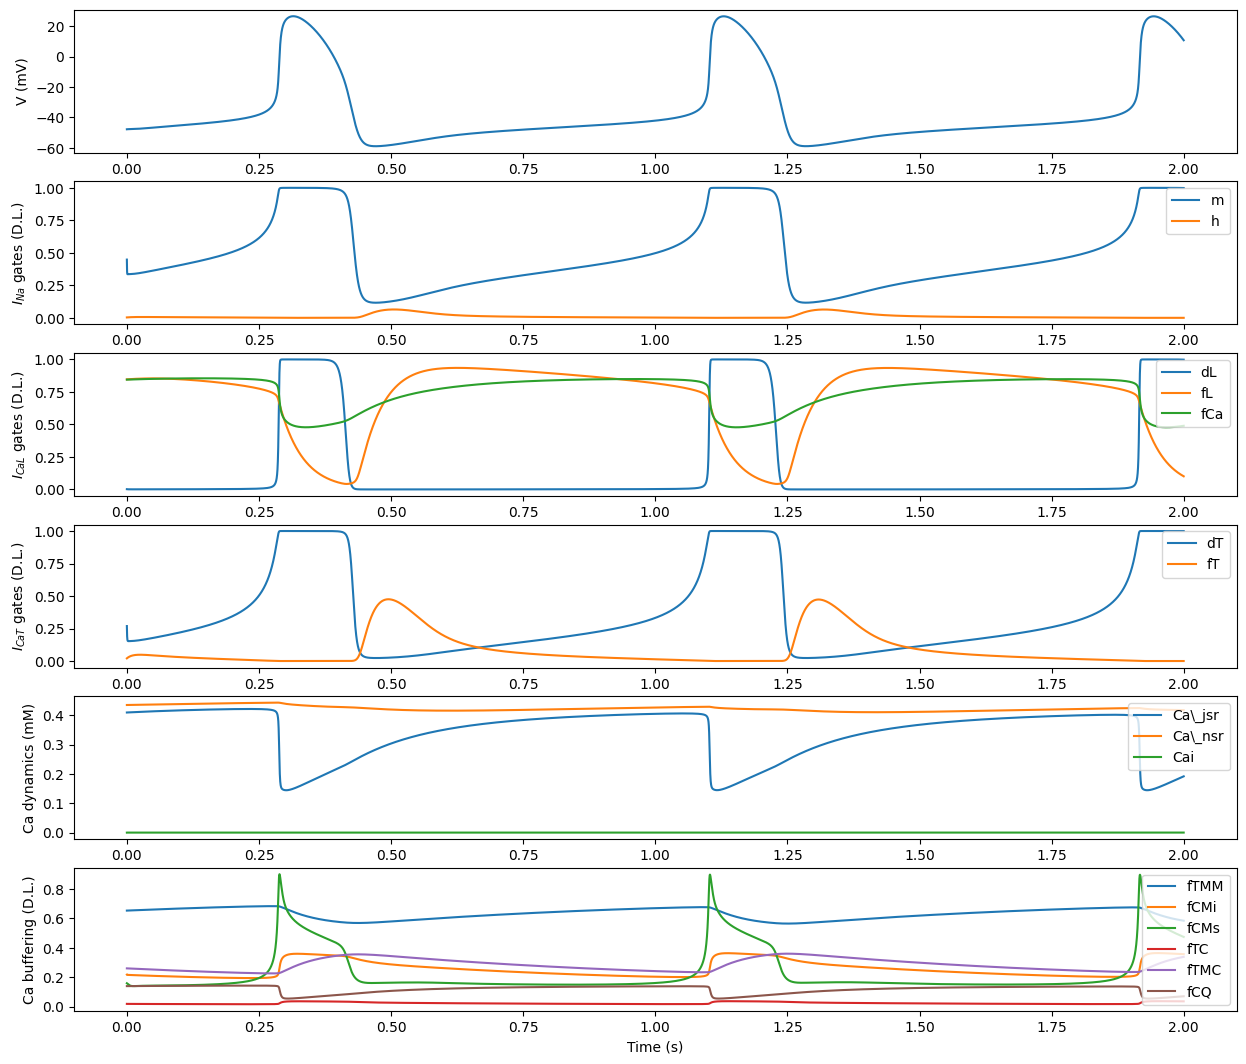

In [3]:
# Definitions for legends (abbreviated)
abbreviated_labels = [
    "V (mV)",
    "Ca$_{sub}$ (mM)",
    "y (D.L.)",
    "m/h (D.L.)",  # Combined m and h
    "dL/fL/fCa (D.L.)",  # Combined dL, fL, and fCa
    "dT/fT (D.L.)",  # Combined dT and fT
    "R/O/I/RI (D.L.)",  # Combined R, O, I, RI
    "Ca$_{jsr}$/Ca$_{nsr}$/Cai (mM)",  # Combined Ca_jsr, Ca_nsr, Cai
    "Buffers (D.L.)",  # Combined other buffering-related states
]

subplot_labels = [
    "Membrane Potential (V)",
    "$I_{Na}$ Gates (m/h)",
    "$I_{CaL}$ Gates (dL/fL/fCa)",
    "$I_{CaT}$ Gates (dT/fT)",
    "Ca Dynamics (Ca_jsr/Ca_nsr/Cai)",
    "Ca Buffering (fTMM/fCMi/fCMs/fTC/fTMC/fCQ)"
]

plt.figure(figsize=(15, 13))

plt.subplot(6, 1, 1)
plt.plot(sol.t, sol.y[0])
plt.ylabel("V (mV)", fontsize=10)

plt.subplot(6, 1, 2)
plt.plot(sol.t, sol.y[4], label="m")
plt.plot(sol.t, sol.y[5], label="h")
plt.ylabel("$I_{Na}$ gates (D.L.)", fontsize=10)
plt.legend(loc="upper right")

plt.subplot(6, 1, 3)
plt.plot(sol.t, sol.y[6], label="dL")
plt.plot(sol.t, sol.y[7], label="fL")
plt.plot(sol.t, sol.y[8], label="fCa")
plt.ylabel("$I_{CaL}$ gates (D.L.)", fontsize=10)
plt.legend(loc="upper right")

plt.subplot(6, 1, 4)
plt.plot(sol.t, sol.y[9], label="dT")
plt.plot(sol.t, sol.y[10], label="fT")
plt.ylabel("$I_{CaT}$ gates (D.L.)", fontsize=10)
plt.legend(loc="upper right")

plt.subplot(6, 1, 5)
plt.plot(sol.t, sol.y[15], label="Ca\_jsr")
plt.plot(sol.t, sol.y[16], label="Ca\_nsr")
plt.plot(sol.t, sol.y[17], label="Cai")
plt.ylabel("Ca dynamics (mM)", fontsize=10)
plt.legend(loc="upper right")

plt.subplot(6, 1, 6)
plt.plot(sol.t, sol.y[18], label="fTMM")
plt.plot(sol.t, sol.y[19], label="fCMi")
plt.plot(sol.t, sol.y[20], label="fCMs")
plt.plot(sol.t, sol.y[21], label="fTC")
plt.plot(sol.t, sol.y[22], label="fTMC")
plt.plot(sol.t, sol.y[23], label="fCQ")
plt.ylabel("Ca buffering (D.L.)", fontsize=10)
plt.legend(loc="upper right")

plt.xlabel("Time (s)")
plt.savefig("./results/selected_states.svg", format="svg")
plt.show()

<h2>Plotting all States</h2>
<p>The following code is used to visualize the simulation results. It includes the definition of the legend labels for the different states and plots all 33 states, each in a separate subplot.</p>

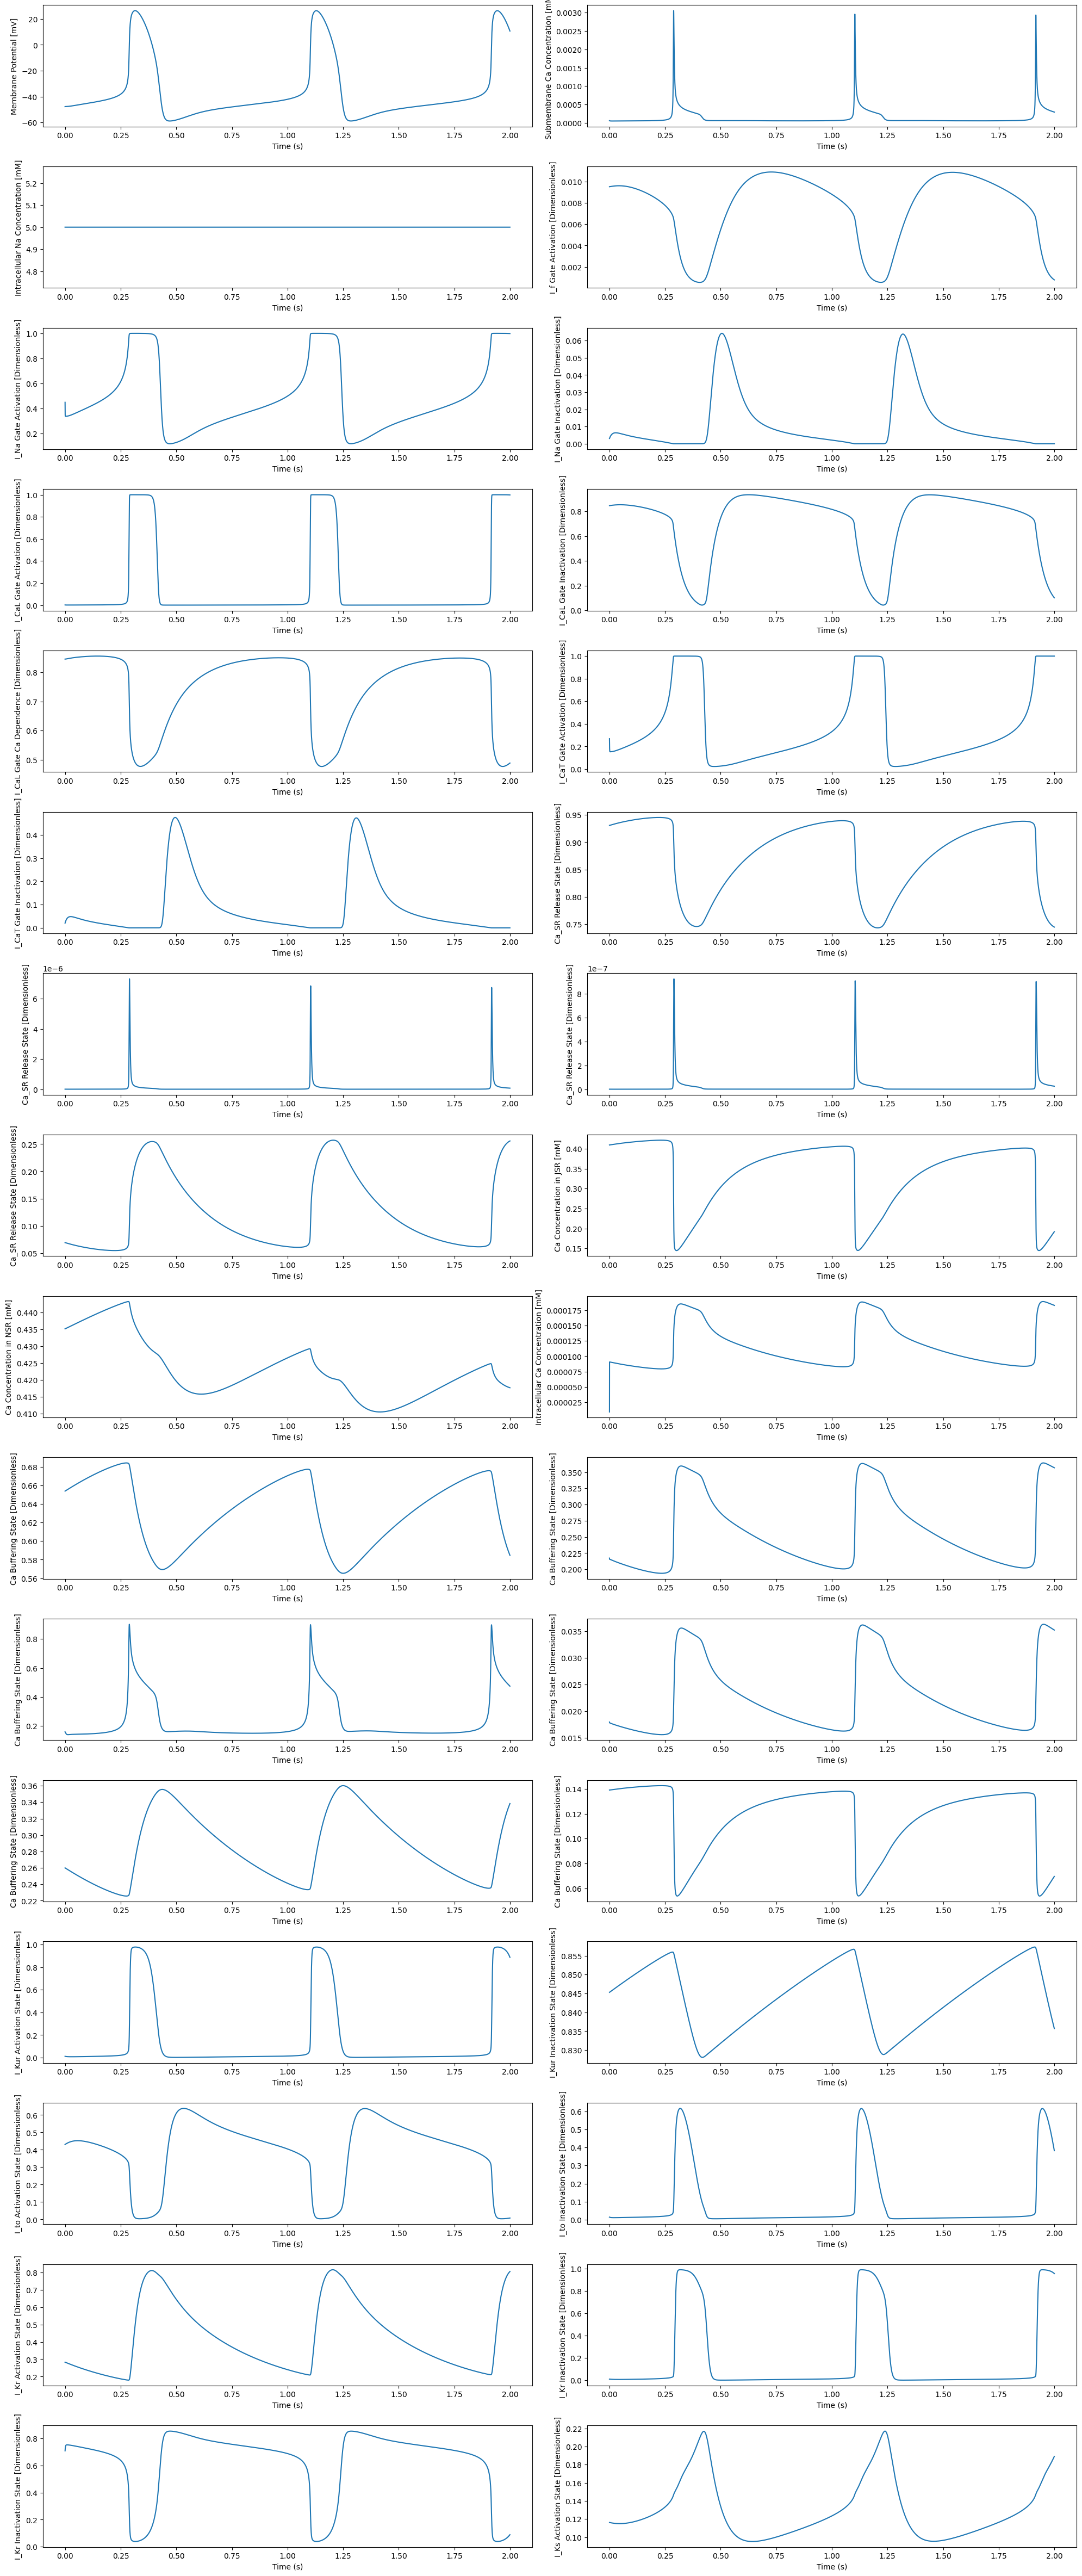

In [4]:
# Get the labels of the states
state_labels = san.get_state_labels()

# Plotting the states
plt.figure(figsize=(20, 50))

# Iterate through the range of states and create subplots
for i in range(1, 33):
    plt.subplot(17, 2, i)

    # Plot the state values over time
    plt.plot(sol.t, sol.y[i-1])

    # Set y-axis label and font size
    plt.ylabel(state_labels[i-1], fontsize=10)

    # Set x-axis label
    plt.xlabel("Time (s)")

# Display the plots
plt.tight_layout()  # Ensure proper spacing between subplots
plt.savefig("./results/all_states.svg", format="svg")
plt.show()